In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

In [32]:
# Example dataset with missing values
data = {
    'soil_texture': ['sandy', 'loamy', 'clayey', 'sandy', 'clayey', 'loamy'],
    'pH': [5.5, 6.0, 7.2, 5.9, 5.9, 6.8],
    'moisture_content': [10.5, 12.0, 11.4, 9.8, 11.2, 13.5],
    'organic_matter': [2.1, 3.5, 4.0, 3.5, 3.8, 2.9],
    'soil_type': ['sandy', 'loamy', 'clayey', 'sandy', 'clayey', 'loamy']
}
df = pd.DataFrame(data)

# Handle missing data by imputing with the mean (for numerical columns)
df['pH'] = df['pH'].fillna(df['pH'].mean())
df['moisture_content'] = df['moisture_content'].fillna(df['moisture_content'].mean())
df['organic_matter'] = df['organic_matter'].fillna(df['organic_matter'].mean())

# Drop rows with missing categorical values
df = df.dropna()

print("Preprocessed Data:")
print(df)

Preprocessed Data:
  soil_texture   pH  moisture_content  organic_matter soil_type
0        sandy  5.5              10.5             2.1     sandy
1        loamy  6.0              12.0             3.5     loamy
2       clayey  7.2              11.4             4.0    clayey
3        sandy  5.9               9.8             3.5     sandy
4       clayey  5.9              11.2             3.8    clayey
5        loamy  6.8              13.5             2.9     loamy


In [33]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np

# Label encode soil_texture and soil_type
encoder = LabelEncoder()
df['soil_texture'] = encoder.fit_transform(df['soil_texture'])
df['soil_type'] = encoder.fit_transform(df['soil_type'])

X = df.drop(['soil_type'], axis=1)
y = df['soil_type']
# Standardize Features
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[0], activation='softmax')  # Output layer with softmax for multi-class classification
])

In [36]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
history = model.fit(X_train, y_train, epochs=20, batch_size=8, validation_split=0.2)

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 1.3041 - accuracy: 0.3333 - val_loss: 1.2867 - val_accuracy: 1.0000
Epoch 2/20
1/1 [==============================] - 0s 64ms/step - loss: 1.2043 - accuracy: 0.6667 - val_loss: 1.2924 - val_accuracy: 1.0000
Epoch 3/20
1/1 [==============================] - 0s 66ms/step - loss: 1.4831 - accuracy: 0.0000e+00 - val_loss: 1.2982 - val_accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 0s 73ms/step - loss: 1.2323 - accuracy: 0.6667 - val_loss: 1.3042 - val_accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 65ms/step - loss: 1.2624 - accuracy: 0.0000e+00 - val_loss: 1.3103 - val_accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 66ms/step - loss: 1.3504 - accuracy: 0.3333 - val_loss: 1.3162 - val_accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 63ms/step - loss: 1.3531 - accuracy: 0.3333 - val_loss: 1.3224 - val_accuracy: 1.0000
Epoch 8/20
1/1 [=====

In [38]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

1/1 [==============================] - 0s 71ms/step - loss: 1.4686 - accuracy: 0.0000e+00
Test Accuracy: 0.0


In [39]:
y_test

0    2
1    1
Name: soil_type, dtype: int32

In [40]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 56ms/step - loss: 1.4686 - accuracy: 0.0000e+00


[1.4685518741607666, 0.0]

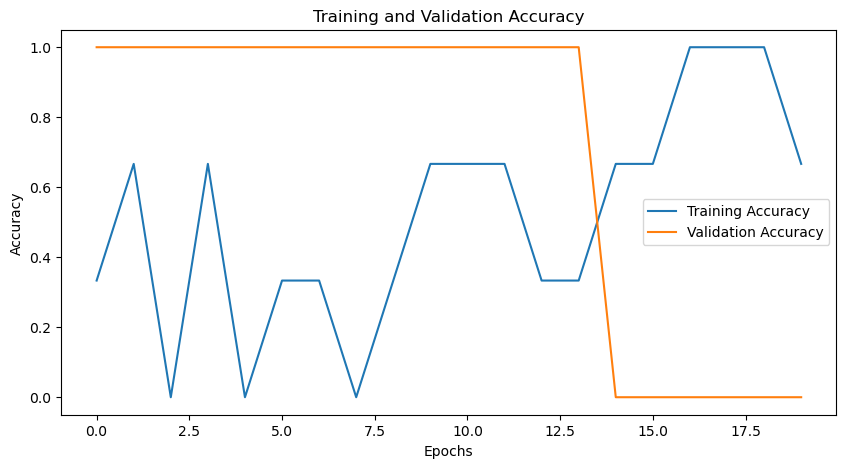

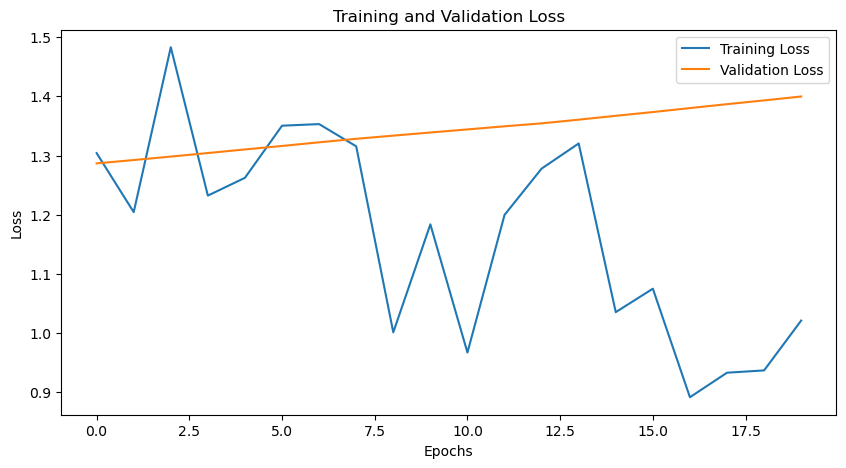

In [41]:
# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [42]:
# Save the model
model.save('soil_classification_model.h5')

# Load the model
from tensorflow.keras.models import load_model
loaded_model = load_model('soil_classification_model.h5')

In [43]:
import os

model_file = 'soil_classification_model.h5'
model_size = os.path.getsize(model_file) / (1024 * 1024)  # Convert bytes to MB
print(f"Model Size: {model_size:.2f} MB")

Model Size: 0.06 MB


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Step 1: Create a synthetic dataset
np.random.seed(42)
num_samples = 1000

data = {
    'soil_texture': np.random.choice(['sandy', 'loamy', 'clayey'], size=num_samples),
    'pH': np.random.uniform(4.0, 8.5, size=num_samples),
    'moisture_content': np.random.uniform(0.1, 30.0, size=num_samples),
    'organic_matter': np.random.uniform(0.5, 5.0, size=num_samples),
    'bulk_density': np.random.uniform(1.0, 1.8, size=num_samples),
    'soil_type': np.random.choice(['sandy', 'loamy', 'clayey'], size=num_samples)
}

df = pd.DataFrame(data)

# Introduce some missing values
for col in df.columns[:-1]:
    df.loc[df.sample(frac=0.1).index, col] = np.nan

# Step 1: Data Preprocessing
# Handle missing data
imputer = SimpleImputer(strategy='mean')

# Encode categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Scale numerical features
scaler = StandardScaler()

# Separate features and labels
X = df.drop(columns=['soil_type'])
y = df['soil_type']

# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('impute', imputer), ('scale', scaler)]), ['pH', 'moisture_content', 'organic_matter', 'bulk_density']),
        ('cat', encoder, ['soil_texture'])
    ]
)

X_processed = preprocessor.fit_transform(X)

# Encode labels
y_encoded = pd.Categorical(y).codes

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_encoded, test_size=0.2, random_state=42)

In [56]:
# Step 3: Build the Deep Learning Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [57]:
# Step 4: Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 64)                512       
                                                                 
 dropout_18 (Dropout)        (None, 64)                0         
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dropout_19 (Dropout)        (None, 32)                0         
                                                                 
 dense_28 (Dense)            (None, 3)                 99        
                                                                 
Total params: 2,691
Trainable params: 2,691
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
20/20 [==============================] - 1s 17ms/step - loss: 1.1272 - accuracy: 0.3359 - val_loss: 1.1222 - val_accuracy: 0.3063
Epoch 2/50
20/20 [==============================] - 0s 6ms/step - loss: 1.1146 - accuracy: 0.3594 - val_loss: 1.1191 - val_accuracy: 0.3000
Epoch 3/50
20/20 [==============================] - 0s 6ms/step - loss: 1.1065 - accuracy: 0.3609 - val_loss: 1.1175 - val_accuracy: 0.3125
Epoch 4/50
20/20 [==============================] - 0s 7ms/step - loss: 1.0975 - accuracy: 0.3672 - val_loss: 1.1173 - val_accuracy: 0.3375
Epoch 5/50
20/20 [==============================] - 0s 6ms/step - loss: 1.1067 - accuracy: 0.3750 - val_loss: 1.1154 - val_accuracy: 0.3750
Epoch 6/50
20/20 [==============================] - 0s 5ms/step - loss: 1.0965 - accuracy: 0.3688 - val_loss: 1.1152 - val_accuracy: 0.3500
Epoch 7/50
20/20 [==============================] - 0s 5ms/step - loss: 1.0819 - accuracy: 0.4156 - val_loss: 1.1162 - val_accuracy: 0.3438
Epoch 8/50
20/20 [=

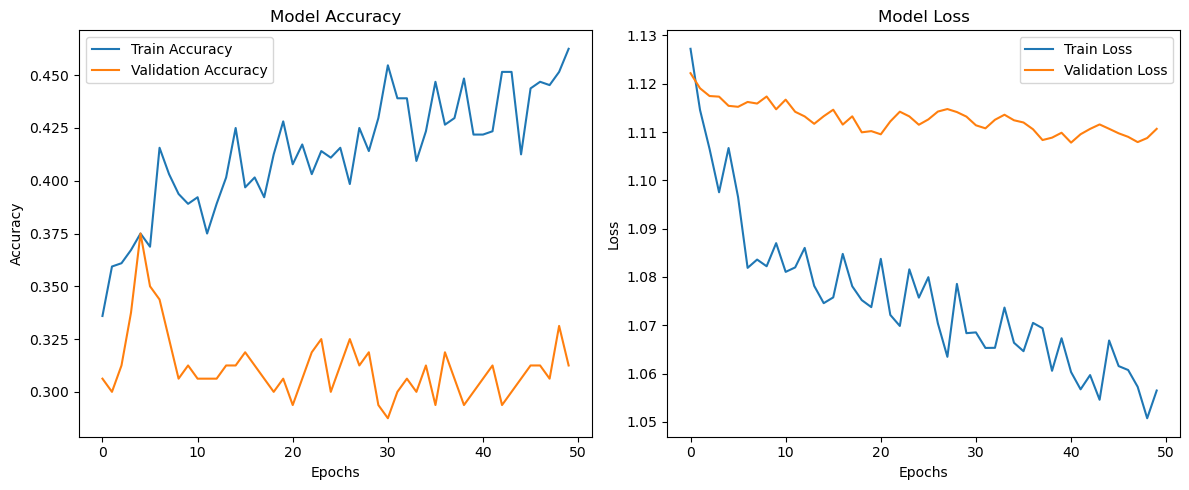

Model Size: 2691 parameters


In [59]:
# Step 5: Train the Model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Step 6: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.2f}')

# Classification Report
y_pred = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_test, y_pred, target_names=['sandy', 'loamy', 'clayey']))

# Step 7: Visualize Training and Validation Accuracy
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Step 8: Save and Load the Model
model.save('soil_classification_model.h5')
loaded_model = tf.keras.models.load_model('soil_classification_model.h5')

# Step 9: Model Size
model_size = sum([np.prod(v.shape) for v in model.trainable_variables])
print(f'Model Size: {model_size} parameters')